# <center> Regressão Linear Múltipla em Python </center>

## Basic ToolBox - Regressão Linear Mútipla II

In [100]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sn
import scipy.stats
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 

### Base de Dados para Exemplificação

In [101]:
# Carregando dados para exemplificação
df = pd.read_csv('clorofila.csv')
df.head()

,Condutividade,DO,pH,ORP,Profundidade,Temperatura,Turbidez,Clorofila
0,121.73,8.32,7.47,198.04,0.37,20.55,6.98,59.97
1,121.29,5.67,6.90,231.30,0.40,19.98,4.65,30.59
2,120.77,5.33,6.79,229.20,0.42,19.61,3.94,17.06
3,119.50,7.61,7.10,228.61,0.41,19.47,5.20,38.00
4,121.17,7.96,7.12,208.77,0.39,19.73,4.76,24.39


##  <center> Dividindo as variaveis em Independentes e dependente </center>

In [102]:
# Variavies Independentes
x = df.drop(columns=['Clorofila'])

# Variavel Dependente
y = df['Clorofila']

# <center> Constante B-zero </center>

## ``B-zero``

Caso o erro não tenha **média 0**, dizemos que nosso **modelo possui um erro sistemático**, também conhecido como **viés**.
Por exemplo, se a **média dos erros** é **-5**, isso significa que, em média o **modelo superestima as previsões** e teríamos que **descontar esse erro** da previsão. 

A boa notícia é que, o **Coeficiente Linear**, o ``B-zero``, faz justamente esse papel, por isso introduzimos sempre a **constante** ``B-zero``, caso não seja inserida, provavelmente terá um **viés** 

## statsmodels.tools.tools.``add_constant``

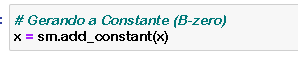

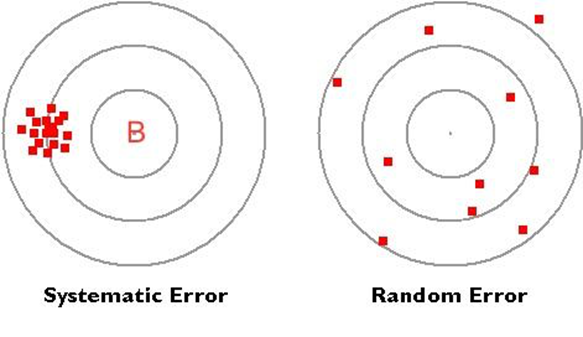


In [103]:
# Gearndo a constante B-zero
x = sm.add_constant(x)

## <center> Gerando Modelo de Regressão Linear Multipla </center>

In [104]:
# Calculando os Betas
model_linear_mult = sm.OLS(y, x)

In [105]:
# Ajuste do modelo (Reta) de acordo com os betas 
model_linear_mult = model_linear_mult.fit()

In [106]:
# Obtendo as previsões
pred_cl = model_linear_mult.predict(x)

In [107]:
# Obtendo os erros pela diferença entre o "REAL" e a "PREDIÇÃO"
erro_cl = y - pred_cl

In [108]:
# Gerando uma coluna com os indices
df.reset_index(inplace=True)
# Será o eixo x para comparar no eixo y os erros

## <center> Tabela de Resumo das Estatisticas </center>

In [109]:
# Metricas para avalição do modelo gerado
display(model_linear_mult.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Clorofila   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     75.55
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           1.75e-74
Time:                        10:37:38   Log-Likelihood:                -1914.5
No. Observations:                 512   AIC:                             3845.
Df Residuals:                     504   BIC:                             3879.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -46.1466      7.801     -5.916      0.000     -61.473     -30.820
Condutividade     0.4427      0.046      9.600      0.000       0.352       0.533
DO                2.3072      0.571      4.039      0.000       1.185       3.430
pH                5.6649      1.320      4.291      0.000       3.071       8.258
ORP               0.0103      0.006      1.786      0.075      -0.001       0.022
Profundidade    -33.4486      6.411     -5.217      0.000     -46.045     -20.852
Temperatura      -1.7361      0.230     -7.537      0.000      -2.189      -1.284
Turbidez          0.0204      0.009      2.229      0.026       0.002       0.038
==============================================================================
Omnibus:                       11.623   Durbin-Watson:                   0.393
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               18.391
Skew:                           0.147   Prob(JB):                     0.000102
Kurtosis:                       3.881   Cond. No.                     4.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Teste t de Student

O teste t de Student, que é um teste de hipóteses utilizado quando queremos tirar conclusões de um grupo inteiro de indivíduos com base em apenas uma pequena amostra coletada

# <center> Autocorrelação em Resíduos </center>
 
Na **regressão linear** ou **não linear**, supõe-se que os **resíduos sejam independentes**, ``não correlacionados`` uns dos outros. Se a **suposição de independência for violada**, alguns resultados de **ajuste do modelo**, podem **não** ser **confiáveis**. 

Uma das formas mais simples de, **identificar** se os **resíduos** são de fato **aleatórios**, é utilizando **gráficos**, onde, plotamos no eixo X as observações, as linhas, numero de linhas, ou os indecices das linhas. Em tese, os **resíduos** deveriam estar **centrados** em **0** e variancia constante, e  deste modo, possuir uma **distribuição normal**.  Na prática, isso significa que, **ao redor da reta** que passa pelo **0**, os **erros** devem estar bem **distribuídos** para **quaisquer valores** no **eixo X**.

Um **resíduo, não pode** ajudar a **prever um outro,** isso caracteriza **resíduo não aleatório**. Além de graficamente, podemos realizar o **teste de hipótese** de ``Durbin-Watson``, para **checar se os resíduos** são ``autocorrelacionados`` ou **não**.

## ``Durbin-Watson``

O ``teste Durbin-Watson`` é uma **medida de autocorrelação em residuais** de um **modelo de regressão**. O teste ``Durbin-Watson`` utiliza uma **escala** de ``0`` **a** ``4``, com **valores de ``0`` a ``2`` indicando ``autocorrelação positiva``**, ``2`` indicando **ausência de ``autocorrelação``** e ``2`` **a** ``4`` indicando ``autocorrelação negativa``.

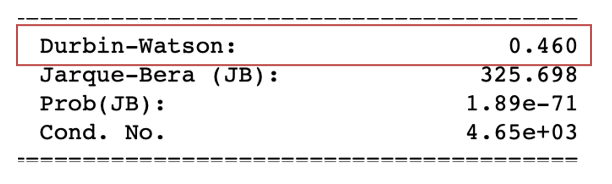


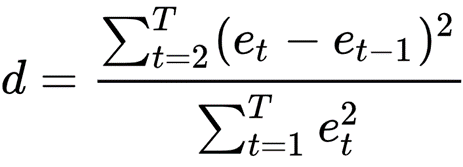

``t = 1`` : Inicia se pela 1º observação (linha)

``t = 2`` : Inicia se pela 2º observação (linha)

``e`` : Residuos (erros)

``t - 1`` : Observação anterior (linha antecessora a observada)

``Σ^T`` : Soma de Todos os termos residuais 

Existe uma **leve tendencia**

## <center> Grafico de Dispersão - Residuos em Torno de Zero ( Esperado - Correto ) </center>

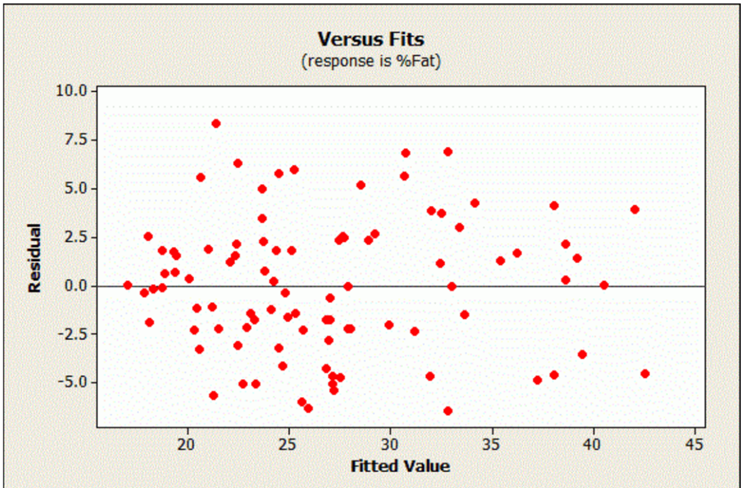

Uma ``autocorrelação positiva`` é identificada por um agrupamento de resíduos com o **mesmo sinal**. Uma ``autocorrelação negativa`` é identificada por rápidas **mudanças nos sinais de resíduos** consecutivos. Utiliza se a estatística ``Durbin-Watson`` para **testar** a presença de ``autocorrelação``.

## <center> Grafico de Dispersão - Residuos Padronizados ( Viés - Errado ) </center>

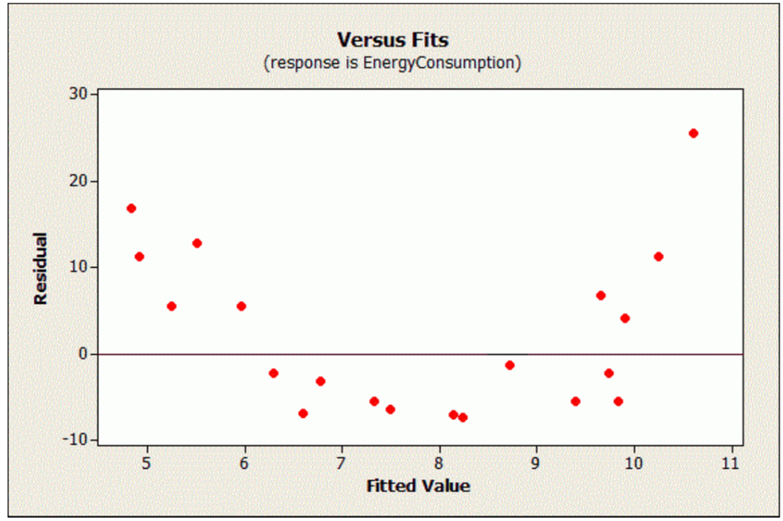

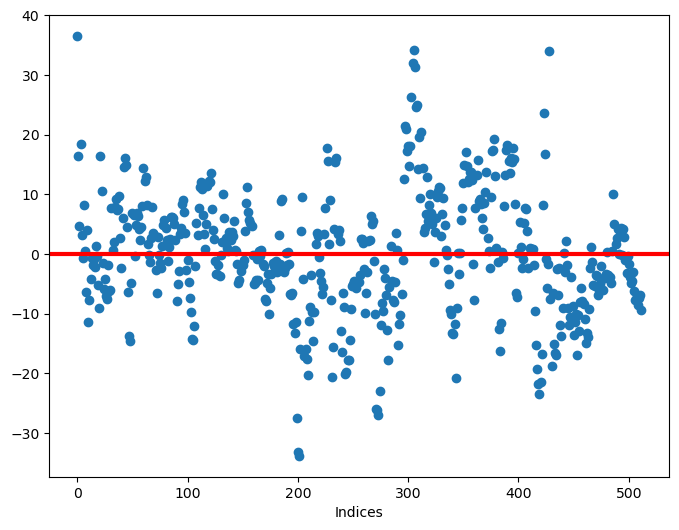

In [110]:
# Plotando uma grafico de dispersão
# Erros no eixo  y e o indice no eixo x
plt.figure(figsize=(8, 6))
plt.scatter(df['index'], erro_cl)
plt.xlabel('Indices')
plt.axhline(0, color='r', linewidth = 3)
plt.show()
# Aparentemente a maior parte dos erros estão localizados em torno de zero no eixo y

### No grafico com os residuos plotado acima observa se claramente um padrão:

* Para **valores menores** de **6** e **maiores** que **10**, espera se um **erro positivo**. 

* Para **valores acima** de **6** e **abaixo** que  **10**, espera se um **erro negativo**. 

## statsmodels.graphics.``plot_acf``

* **Trace** a **função de autocorrelação**. Representa as **defasagens na horizontal** e as **correlações no eixo vertical**

In [111]:
from statsmodels.graphics.tsaplots import plot_acf

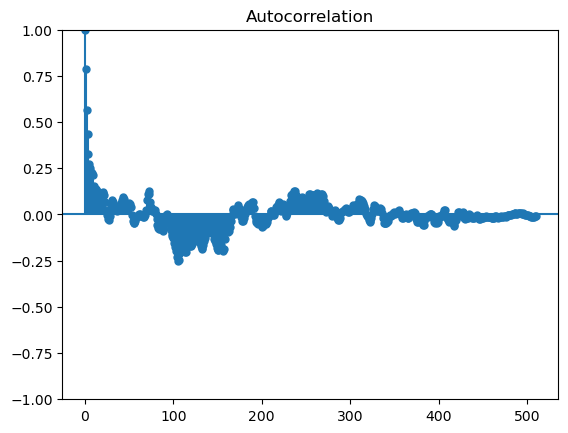

In [112]:
# Pltando um grafico com a função de correlçao
plot_acf(erro_cl, lags=510, alpha=None)
plt.show()

# <center> Correlação entre Residuos e Preditor </center>

Quando há um **padrão**, entre os **resíduos** e **algum preditor**, é sinal de que algo está errado. Geralmente isso **ocorre quando deixamos de fora alguma especificação** que tem **relação com a variável dependente** em questão. Também pode ser oriundo de **erro de medição** do **preditor**.

Uma outra hipótese para a **regressão linear** é da que seus **resíduos** devem ser ``homocedásticos``. Isso significa que a **variância dos resíduos** é uma **constante**.

### ``Homocedasticidade`` 
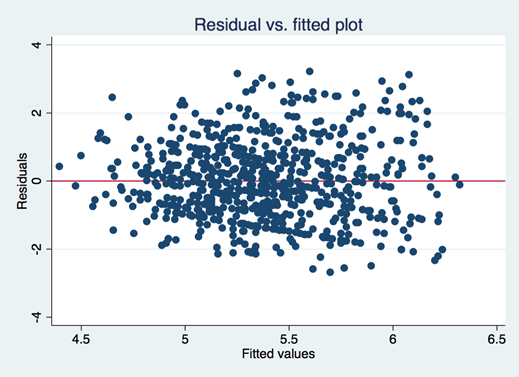
<br>

### ``Heterocedasticidade`` 
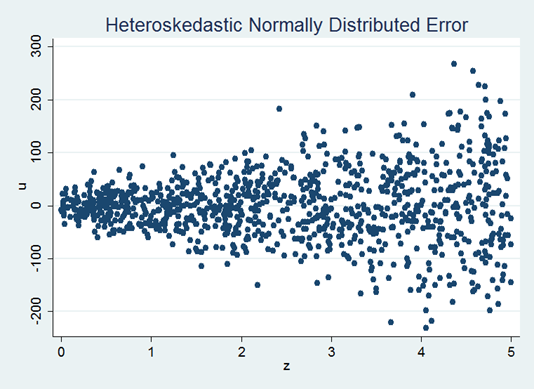
<br>

Uma das principais consequências da ``heterocedasticidade``, é que, essa característica **tende a produzir p-valores menores** do que realmente são, **devido ao crescimento da variância**. O **teste F** pode ser **prejudicado**, e com isso, perdemos a confiança no resultado. 

### Para resolver esse problema podemos:

- **Redefinir o Target** (problema de amplitude alta - valores muito baixos e muitos altos bem distantes)
- **Transformações nos preditores** (Box Cox e Yeo Johnson)

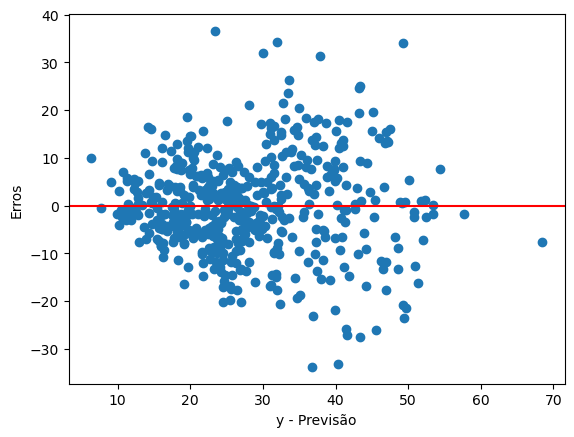

In [113]:
# Plotando um Grafico de dispersão "Previsão VS Residuos"
plt.scatter(pred_cl, erro_cl)
plt.axhline(0, color='r')
plt.xlabel('y - Previsão')
plt.ylabel('Erros')
plt.show()

### ``Teste de Breusch–Pagan``

Em estatística, o **teste de Breusch-Pagan**, desenvolvido em 1979 por **Trevor Breusch** e **Adrian Pagan**, é usado para **testar a heterocedasticidade** em um modelo de regressão linear.

# <center> Multicolinearidade </center> 

``Multicolinearidade`` consiste em um **problema comum em regressões**, no qual, as **variáveis independentes** possuem, entre elas, **relações lineares** exatas ou aproximadamente exatas.

Um dos indícios da **existência** da ``multicolinearidade``, é quando, o ``R²`` é bastante **alto**, mas **nenhum dos coeficientes da regressão é estatisticamente significativo**.

Em sintese,  a ``multicolinearidade`` é uma situação em que duas ou mais **variáveis independentes** em um **modelo de regressão**, encontram-se **altamente correlacionadas**. Essa alta correlação, pode afetar a qualidade dos resultados do modelo, e dificultar a interpretação dos resultados.

Geralmente espera se que os preditores tenham boa correlação com a variavel resposta, pois deste modo, esperamos um melhor ajuste do modelo e, consequentemente, previsões mais acuradas, mais confiaveis.

Quando as **variáveis independentes são altamente correlacionada**, as variáveis são consideradas ``multicolineares``. Muitos tipos de **técnicas de regressão** pressupõem que a ``multicolinearidade`` **não deve estar presente** no conjunto de dados. É porque, causa problemas na **classificação de variáveis** com base em sua importância, ou,  dificulta o trabalho na **seleção da variável independente mais importante**. 

A **Matriz de Correlação** pode apontar possiveis problemas quanto a existencia de ``multicolinearidade``. Para checar de fato a existencia da ``multicolinearidade``, utiliza se o ``teste de VIF`` ( **V**ariance **I**nflation **F**actor - Fator de Inflação da Variância )

## `` Matiz de Correlção``

A **correlação** pode ser calculada e apresentada como um único valor dentro da escala ``-1 até +1``. **Valores positivos** indicam **correlação positiva**: quando a **variável X aumenta**, a **variável Y também aumenta**. **Valores negativos** indicam que a **correlação é negativa**, isto é, quando a **variável X aumenta**, **Y diminui e vice-versa**.

Uma ``matriz de correlação`` é uma **tabela** que indica os **coeficientes de conexão** entre os fatores ( Variaveis Independentes ). Cada célula da tabela mostra a conexão entre os dois fatores ( Entre Duas Variaveis Independentes ). Uma grade de conexão é utilizada para delinear os **coeficientes de correlção**.

## ``corr`` DataFrame Pandas

* Calcule a correlação de pares de colunas, excluindo valores NA/nulos.

In [114]:
# Removendo a coluna index para visualização
df1 = df.drop(columns=['index'])

# Obtendo a correlçao entre "todas as variaveis"
df1.corr()

,Condutividade,DO,pH,ORP,Profundidade,Temperatura,Turbidez,Clorofila
Condutividade,1.000000,0.142596,0.378197,0.006989,-0.364572,0.492709,0.142743,0.426217
DO,0.142596,1.000000,0.781685,-0.409750,-0.212243,-0.036401,0.037967,0.558135
pH,0.378197,0.781685,1.000000,-0.236384,-0.213147,0.370692,0.133579,0.531646
ORP,0.006989,-0.409750,-0.236384,1.000000,-0.024925,0.324258,0.057712,-0.206729
Profundidade,-0.364572,-0.212243,-0.213147,-0.024925,1.000000,-0.209463,0.013796,-0.360435
Temperatura,0.492709,-0.036401,0.370692,0.324258,-0.209463,1.000000,0.146519,0.006392
Turbidez,0.142743,0.037967,0.133579,0.057712,0.013796,0.146519,1.000000,0.123196
Clorofila,0.426217,0.558135,0.531646,-0.206729,-0.360435,0.006392,0.123196,1.000000


In [115]:
# Removendo a constante para visualizar a correlçao entre as variaveis
x1 = x.drop(columns=['const'])

# Obtendo a correlçao entre as "variaveis independentes"
display(x1.corr())

,Condutividade,DO,pH,ORP,Profundidade,Temperatura,Turbidez
Condutividade,1.000000,0.142596,0.378197,0.006989,-0.364572,0.492709,0.142743
DO,0.142596,1.000000,0.781685,-0.409750,-0.212243,-0.036401,0.037967
pH,0.378197,0.781685,1.000000,-0.236384,-0.213147,0.370692,0.133579
ORP,0.006989,-0.409750,-0.236384,1.000000,-0.024925,0.324258,0.057712
Profundidade,-0.364572,-0.212243,-0.213147,-0.024925,1.000000,-0.209463,0.013796
Temperatura,0.492709,-0.036401,0.370692,0.324258,-0.209463,1.000000,0.146519
Turbidez,0.142743,0.037967,0.133579,0.057712,0.013796,0.146519,1.000000


##  ``Mapa de Calor`` ( Heat map ) com Matiz de Correlção

O **Mapa de Calor** ( ``Heat Map`` ) em Python é uma **ferramenta** poderosa para **visualização de dados** e **análise exploratória**. Um ``mapa de calor`` em python, é uma **visualização gráfica** que representa a **distribuição e intensidade** de uma **variável** em uma **matriz bidimensional**. Essa técnica é amplamente utilizada para **mostrar a relação entre duas variáveis** em um conjunto de dados por **meio de cores** comforme a intensidade da relação.

## seaborn.``heatmap`` 

* Plote dados em retangulares como uma **matriz codificada por cores**. Esta é uma função no **nível dos eixos** e desenhará o **mapa de calor** nos eixos 

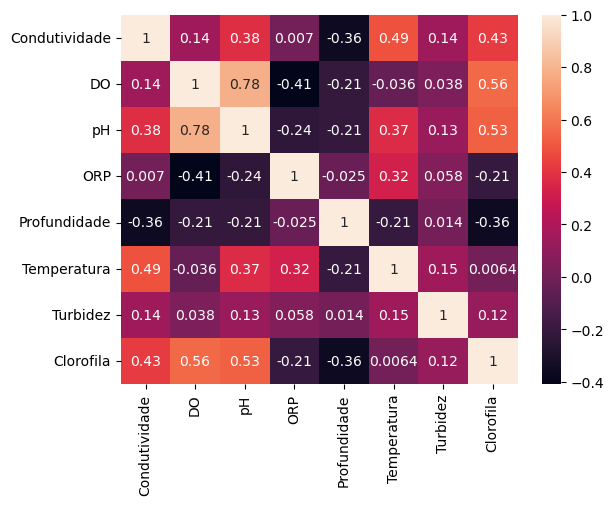

In [116]:
# Extraindo a correlçao entre "todas as variaveis" 
# Gerando um map de calor com a função de correlçao
sn.heatmap(df1.corr(), annot=True);

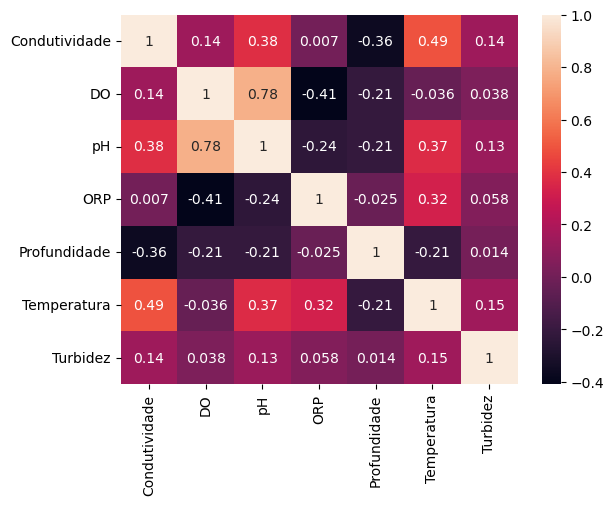

In [117]:
# Extraindo a correlçao entre as "variaveis independentes"
# Gerando um map de calor com a função de correlçao
sn.heatmap(x1.corr(), annot=True);

## ``Teste de VIF`` ( Variance Inflation Factor - Fator de Inflação da Variância )

Uma maneira de **medir** a ``multicolinearidade`` é o **fator de inflação da variância** (``VIF``), que **avalia o quanto a variância** de um coeficiente de regressão estimado aumenta se as suas **preditoras estiverem correlacionadas**. Se nenhum fator estiver correlacionado, os ``VIFs`` serão **todos** ``1``

Ele é **calculado** para cada **variável independente** e fornece uma **estimativa da influência da multicolinearidade** na precisão das estimativas dos coeficientes. Basicamente, o`` VIF`` **mede quanto a variância** de um coeficiente de regressão é aumentada devido à **multicolinearidade** com as outras **variáveis independentes**.

A ideia por traz do ``VIF`` é ajustar modelos para as **variaveis preditora** e calcular o ``R²``, e baseando se no ``R²``, calcula se o ``VIF``. Uma regra do **Tombo** para ``VIF`` é, se ele for **maior que 10**, podemos considerar ``multicolinearidade``

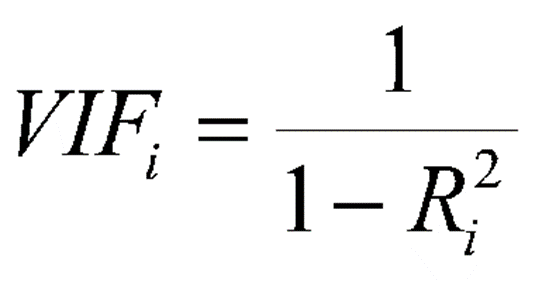

Para **tratar o problema de multicolinearidade**, podemos:

* Dropar uma variável
* Combinar as variável
* Usar outro método de regressão
* Usar Componentes Principais ( PCA )

## ``VIF`` - statsmodels.stats.outliers_influence.``variance_inflation_factor``

* Fator de inflação de variância, VIF, para uma variável exógena. O fator de inflação da variância é uma medida para o aumento da variância das estimativas dos parâmetros se uma variável adicional, dada por exog_idx, for adicionada à regressão linear. É uma medida de multicolinearidade da matriz de design, exog.

In [118]:
# VIF dataframe 
vif_data = pd.DataFrame()

# Gerando uma coluna de variaveis independentes por linha
vif_data['feature'] = x.columns


# calculando VIF  referente a cada variavel independete
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))] 

display(vif_data)

,feature,VIF
0,const,295.983633
1,Condutividade,1.578170
2,DO,4.077955
3,pH,4.617699
4,ORP,1.400597
5,Profundidade,1.232660
6,Temperatura,2.165205
7,Turbidez,1.045372
